Diamond price prediction using various models in python and Visualization using Power BI.

Link to the Power BI file: https://github.com/sanikaardekar/Data-Visualization/blob/main/chocolate%20company%20project%201.pbix
Link to the completed Dashboard: http://bit.ly/3XL2VyO

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor #model
from sklearn.linear_model import  LinearRegression, Lasso #models
from sklearn.neighbors import KNeighborsRegressor #model
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('diamonds.csv')

EDA

In [3]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


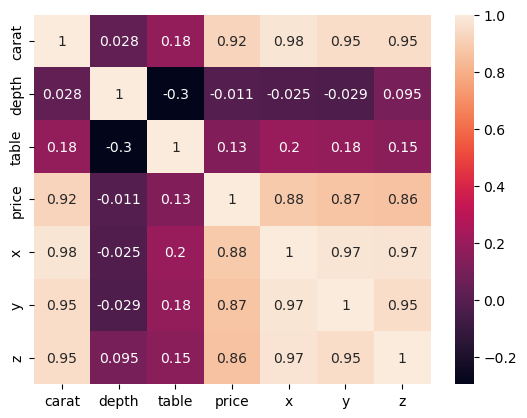

In [6]:
sns.heatmap(dataset.corr(),annot=True);

feature engineering

In [7]:
dataset['symmetry'] = dataset['x']/dataset['y']
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [8]:
dataset = dataset.dropna(axis=0)

In [9]:
dataset_trans=pd.get_dummies(dataset)
X = dataset_trans.drop(['price','x','y','z'],axis=1)
y=dataset_trans['price']
features = X.columns

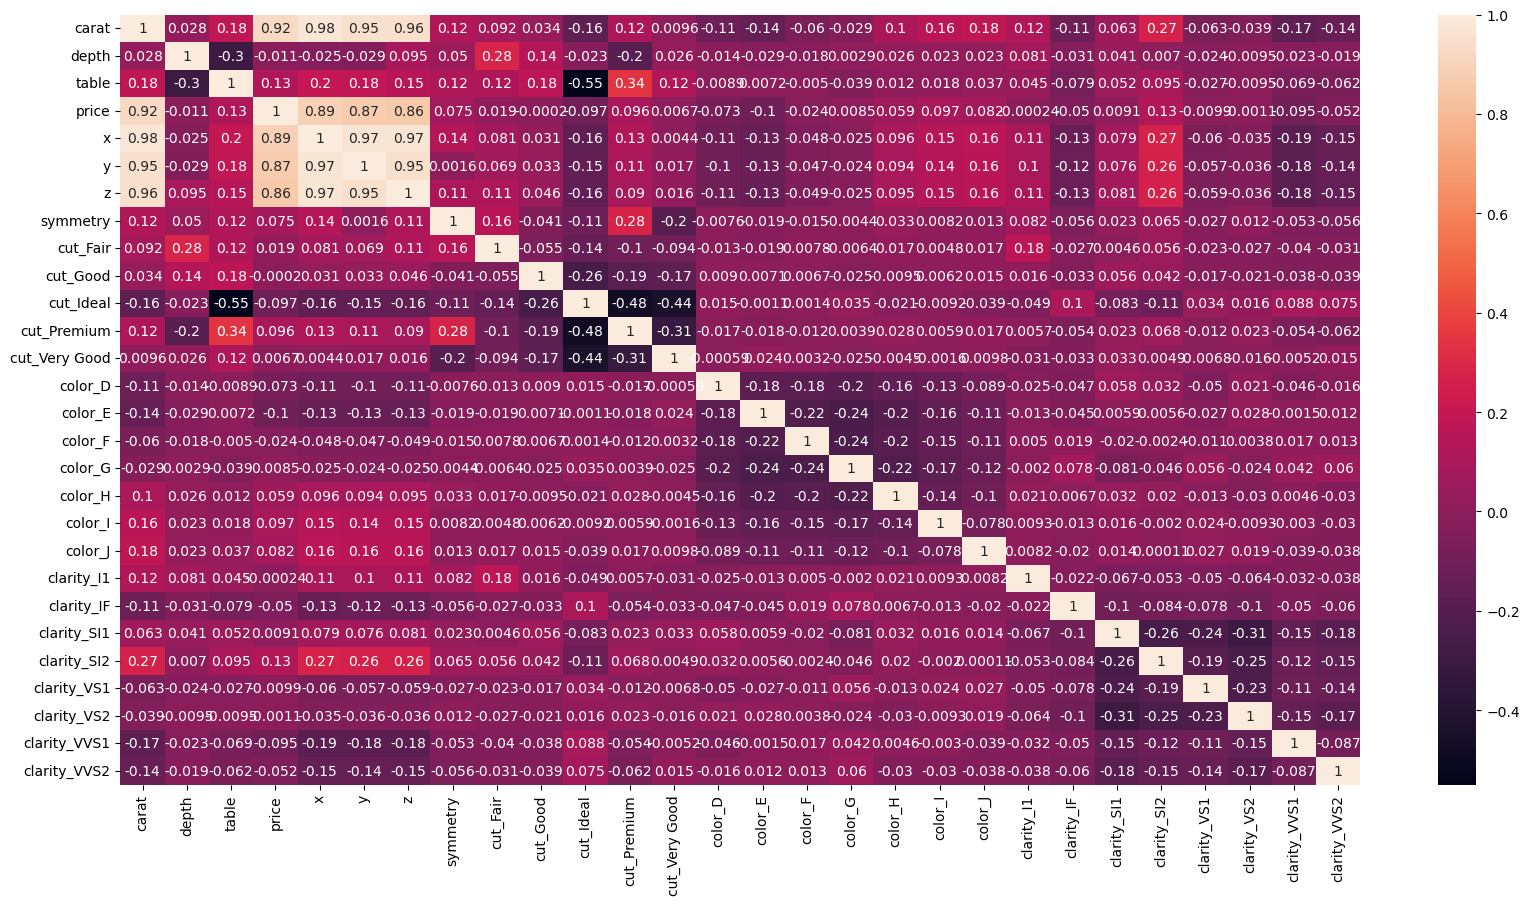

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset_trans.corr(),annot=True);

In [11]:
s = StandardScaler()
X = s.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

Model performance evaluation

In [13]:
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])

In [14]:
ypred_null = y_train.mean()

Linear regression

In [15]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)

KNN

In [16]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

Lasso regression

In [17]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred3 = lasso.predict(X_test)

Random forest regression

In [18]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
y_pred4 = y_pred2 = rf.predict(X_test)

Evaluation

In [19]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,590.887449
MLR,1175.309666
RF,590.887449
Lasso,1175.452705
NULL,3915.225593


Predictions

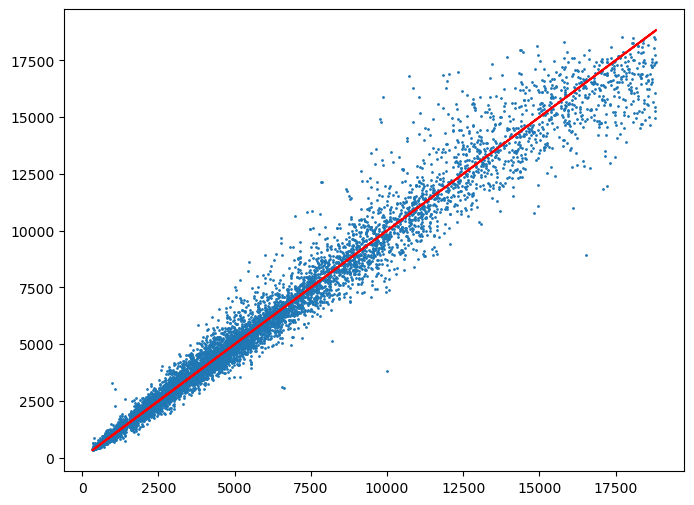

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test,y_pred2,s=1)
ax.plot(y_test,y_test,color='red')

<AxesSubplot:xlabel='price', ylabel='Count'>

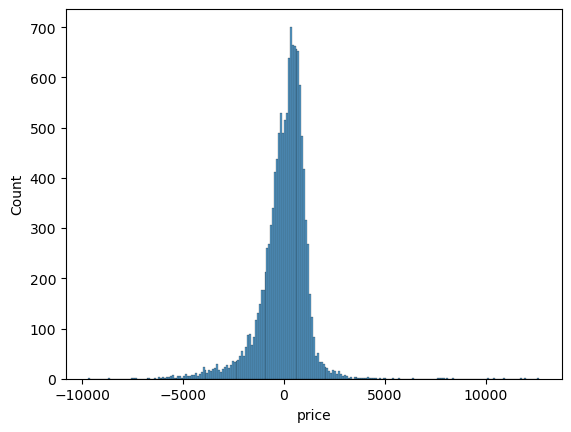

In [21]:
sns.histplot(y_pred-y_test)

linear relation obtained

In [22]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred4 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred4,y_test))

extra tree regressor - fits a number of randomized decision trees (extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
model.feature_importances_.tolist()

[0.8794328780493302,
 0.004089019585036857,
 0.004615207418818235,
 0.004982063453495348,
 0.0011605532922381223,
 0.0006532616647847762,
 0.002200510230530607,
 0.0009520249994443198,
 0.0005386160247204076,
 0.003810856794296526,
 0.003931255166351184,
 0.0019681068772302614,
 0.0032594096131538896,
 0.006200572225404644,
 0.008224553323224797,
 0.00982416549988114,
 0.015368701060919605,
 0.002875319224535935,
 0.012985392519810788,
 0.017390148244035165,
 0.0044219895823266455,
 0.005587969266353101,
 0.0023597537409542086,
 0.0031676721431233654]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
X = dataset.drop(['price','x','y','z'],axis=1)
X=pd.get_dummies(X)
y=dataset['price']
features = X.columns
s = StandardScaler()
X = s.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)
knn.fit(X_train,y_train)
dataset['prediction']=knn.predict(X)